In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from data_cleaner import clean_data

In [2]:
df15 = pd.read_csv('data/marathon_results_2015.csv')
df16 = pd.read_csv('data/marathon_results_2016.csv')
df17 = pd.read_csv('data/marathon_results_2017.csv')
df18 = pd.read_csv('data/marathon_results_2018.csv')
df18.rename(columns={'Blank': 'Unnamed'}, inplace = True)
print(df18.shape)
df18.head()

(24087, 26)


,Unnamed: 0,Unnamed: 0.1,Bib,Name,Age,M/F,City,State,Country,Citizen,...,25K,30K,35K,40K,Pace,Proj. Time,Official Time,Overall,Gender,Division
0,0,0,189,"Ash, Alan",26,M,Atmore,AL,USA,NaN,...,1:31:16,1:50:19,2:09:22,2:28:08,0:05:58,NaN,2:36:04,63,63,59
1,1,1,855,"Goodman, John Mark",38,M,Birmingham,AL,USA,NaN,...,1:34:33,1:53:49,2:13:27,2:33:06,0:06:11,NaN,2:41:52,187,186,173
2,2,2,1049,"Mcclung, Joshua",34,M,Birmingham,AL,USA,NaN,...,1:35:31,1:55:14,2:15:14,2:34:45,0:06:15,NaN,2:43:42,247,246,226
3,3,3,303,"Graham, James",26,M,Birmingham,AL,USA,NaN,...,1:33:09,1:52:29,2:13:49,2:37:17,0:06:23,NaN,2:47:07,385,377,346
4,4,4,5267,"Pierce, Nathaniel",31,M,Huntsville,AL,USA,NaN,...,1:40:23,2:00:42,2:21:22,2:41:26,0:06:30,NaN,2:50:19,608,593,536


In [3]:
df15_clean = clean_data(df15.copy(), 2015)
df16_clean = clean_data(df16.copy(), 2016)
df17_clean = clean_data(df17.copy(), 2017)
df18_clean = clean_data(df18.copy(), 2018)
df18_clean.head()  

,Bib,Name,Age,finish_time,overall_rank,gender_rank,division_rank,pace_slope,temp,humidity,wind,Gender_F,Gender_M
0,189,"Ash, Alan",26,9364,0.002439,0.004436,0.010190,1.84,44,1.0,17,0,1
1,855,"Goodman, John Mark",38,9712,0.007239,0.013096,0.029879,1.51,44,1.0,17,0,1
2,1049,"Mcclung, Joshua",34,9822,0.009562,0.017320,0.039033,1.98,44,1.0,17,0,1
3,303,"Graham, James",26,10027,0.014905,0.026544,0.059758,6.95,44,1.0,17,0,1
4,5267,"Pierce, Nathaniel",31,10219,0.023538,0.041752,0.092573,0.48,44,1.0,17,0,1


In [7]:
df18_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24087 entries, 0 to 24086
Data columns (total 13 columns):
Bib              24087 non-null int64
Name             24087 non-null object
Age              24087 non-null int64
finish_time      24087 non-null int64
overall_rank     24087 non-null float64
gender_rank      24087 non-null float64
division_rank    24087 non-null float64
pace_slope       24087 non-null float64
temp             24087 non-null int64
humidity         24087 non-null float64
wind             24087 non-null int64
Gender_F         24087 non-null uint8
Gender_M         24087 non-null uint8
dtypes: float64(5), int64(5), object(1), uint8(2)
memory usage: 2.3+ MB


In [8]:
df18_clean.columns

Index(['Bib', 'Name', 'Age', 'finish_time', 'overall_rank', 'gender_rank',
       'division_rank', 'pace_slope', 'temp', 'humidity', 'wind', 'Gender_F',
       'Gender_M'],
      dtype='object')

Text(0, 0.5, 'Frequency')

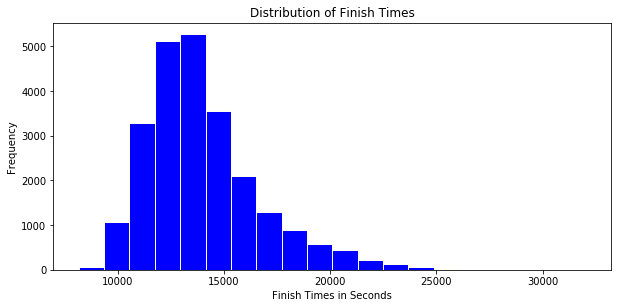

In [55]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2, 1, 1)
line = ax.hist(df18_clean['finish_time'], bins=20, color='blue', histtype='bar', ec='ivory')
ax.set_title('Distribution of Finish Times')
ax.set_xlabel('Finish Times in Seconds')
ax.set_ylabel('Frequency')
# poisson??? or just normal right skewed? 


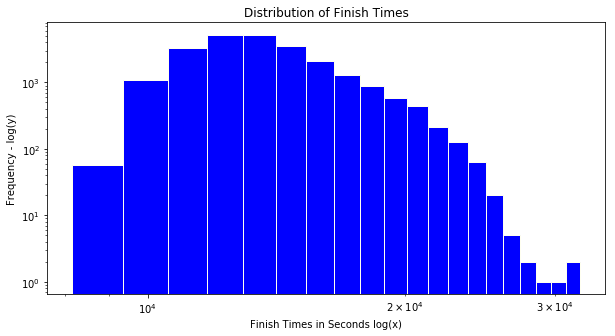

In [54]:
# log x values check for normal
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.hist(df18_clean['finish_time'], bins=20, color='blue', histtype='bar', ec='ivory')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Distribution of Finish Times')
ax.set_xlabel('Finish Times in Seconds log(x)')
ax.set_ylabel('Frequency - log(y)');

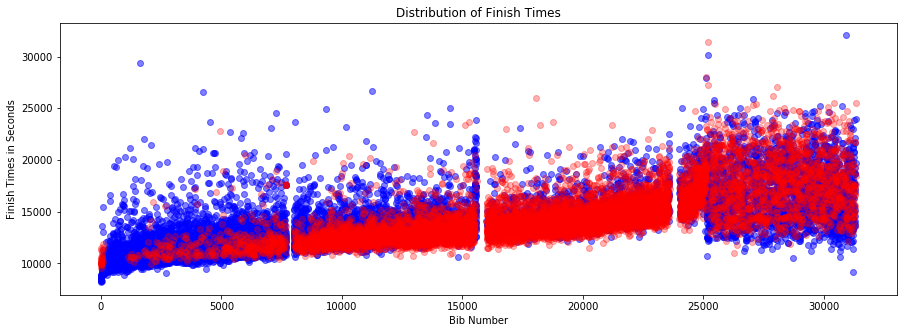

In [66]:
female = df18_clean[df18_clean['Gender_F']==1]
male = df18_clean[df18_clean['Gender_M']==1]

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.scatter(male['Bib'], male['finish_time'], color='blue', alpha=0.5, marker='o')
ax.scatter(female['Bib'], female['finish_time'], color='red', alpha=0.3, marker='o')
ax.set_title('Distribution of Finish Times')
ax.set_ylabel('Finish Times in Seconds')
ax.set_xlabel('Bib Number');

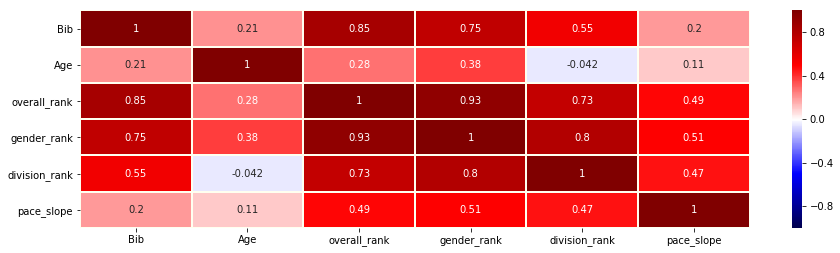

In [11]:
df15_corr = df15_clean[['Bib', 'Age', 'overall_rank', 'gender_rank', 
                  'division_rank', 'pace_slope']].corr()

fig, ax = plt.subplots(figsize=(15,4))
sns.heatmap(df15_corr, ax=ax, cmap="seismic", annot=True, 
            vmin=-1, vmax=1, linewidths=1, linecolor='ivory');

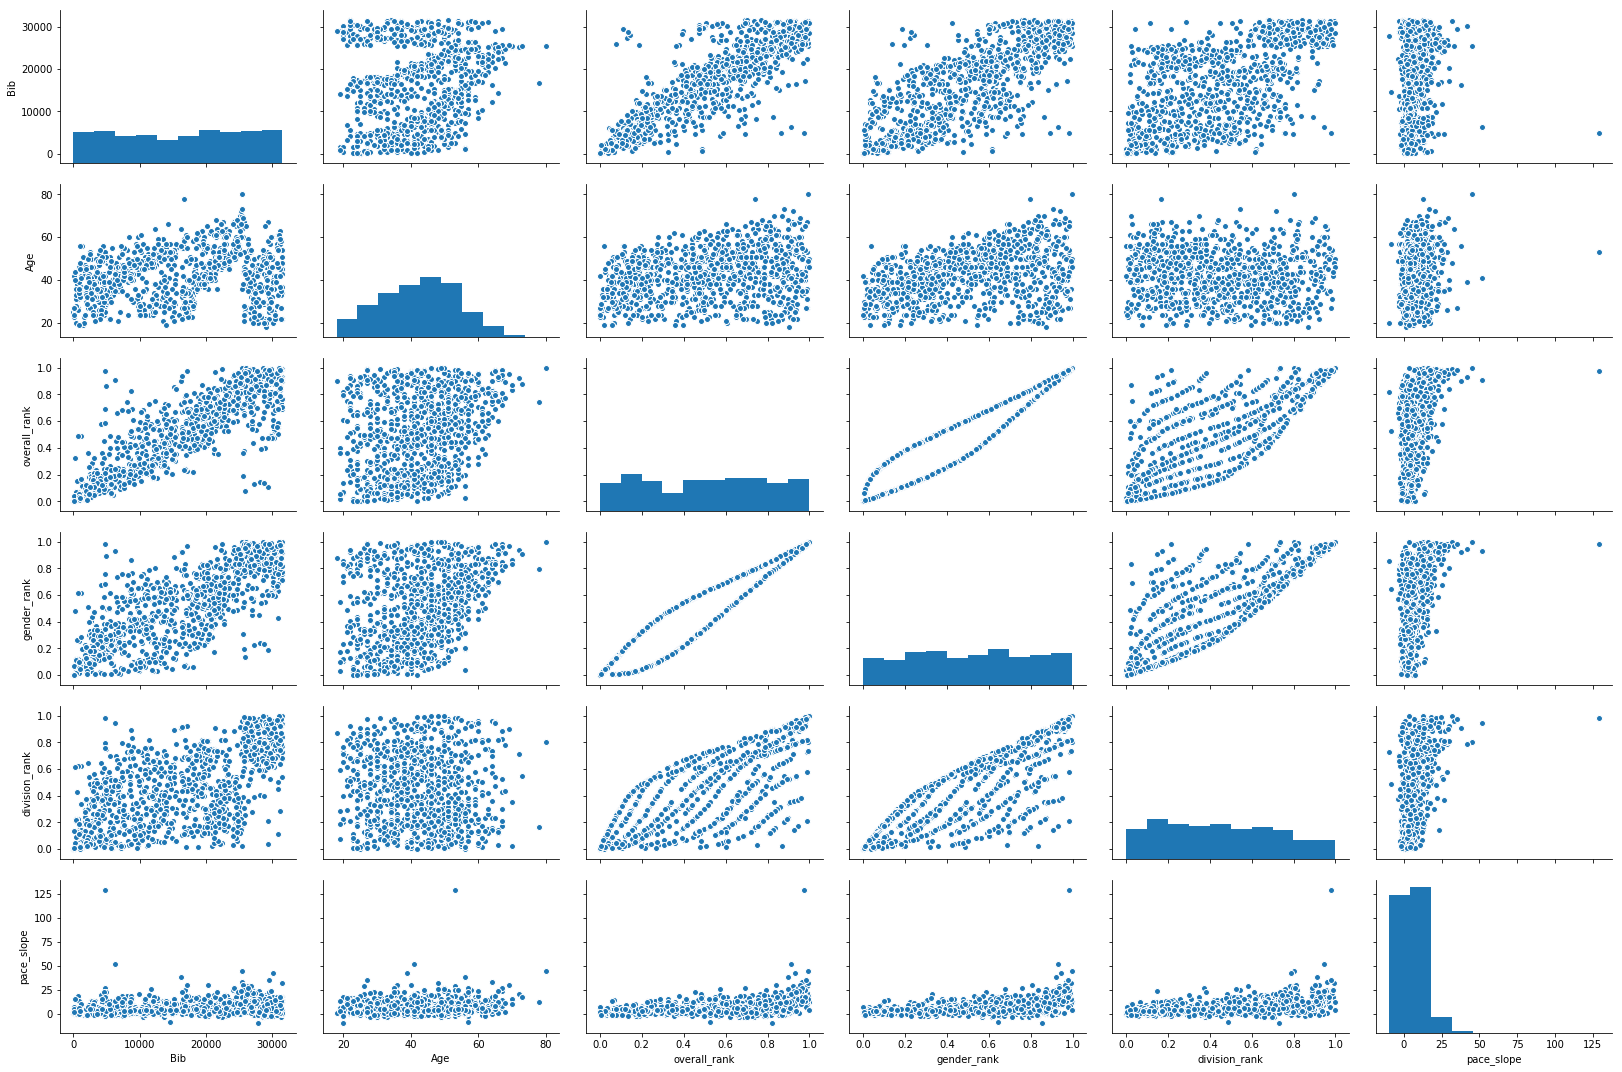

In [56]:
corr_test = df15_clean[['Bib', 'Age', 'overall_rank', 'gender_rank', 
                  'division_rank', 'race_rate']].dropna().sample(1000)
sns.pairplot(corr_test, aspect=1.5);  # consider interaction with gender and gender_rank 

In [87]:
all_legacy_runners = (list(set(df15_clean['Name'])
                       .intersection(df16_clean['Name'])
                       .intersection(df17_clean['Name'])
                       .intersection(df18_clean['Name'])))  #1027 count

legacy15_16 = list(set(df15['Name']).intersection(df16['Name']))  # 5530 count
legacy16_17 = list(set(df16['Name']).intersection(df17['Name']))  # 4995 count
legacy17_18 = list(set(df17['Name']).intersection(df18['Name']))  # 3403 count

In [111]:
# df_legacy15 = df15_clean[df15_clean['Name'].isin(legacy15_16)]  # (5555, 13)
# df_legacy16 = df16_clean[df16_clean['Name'].isin(legacy15_16)]  # (5561, 13)

def merge_dataframes(dfA, dfB, legacy_runners):
    '''Filter the dataframe on only the legacy runners and merge.  
    Then drop the all post years data, except the finish time.'''
    
    # filter the dataframes
    dfA_legacy = dfA[dfA['Name'].isin(legacy_runners)]  
    dfB_legacy = dfB[dfB['Name'].isin(legacy_runners)]  
    
    # merge dataframes on leagcy runner names
    df_merge = dfA.merge(dfB, how='left', on='Name', suffixes=('_A', '_B'))
    # verify merge by age and remove incorrect people with same name
    df_merge = df_merge[df_merge['Age_A'] == df_merge['Age_B'] - 1]
    # columns to drop
    drop_cols = ['finish_time_A', 'Bib_B', 'Age_B', 'overall_rank_B', 'gender_rank_B', 
             'division_rank_B', 'pace_slope_B', 'temp_B', 'humidity_B', 'wind_B', 
             'Gender_F_B', 'Gender_M_B']
    df_merge.drop(drop_cols, inplace=True, axis=1)
    return df_merge 


In [113]:
df16_17_merge = merge_dataframes(df16_clean, df17_clean, legacy16_17)
print(df16_17_merge.shape)
df16_17_merge.head()

(4919, 13)


,Bib_A,Name,Age_A,overall_rank_A,gender_rank_A,division_rank_A,pace_slope_A,temp_A,humidity_A,wind_A,Gender_F_A,Gender_M_A,finish_time_B
3,11,"Korir, Wesley",33,0.000150,0.000277,0.000673,0.42,53,0.55,14,0,1,8294.0
10,16,"Nyasango, Cutbert",33,0.000413,0.000761,0.001850,4.63,53,0.55,14,0,1,8260.0
16,79,"Wells, Clint",40,0.000638,0.001175,0.000502,2.69,53,0.55,14,0,1,9041.0
25,119,"Maravilla, Jorge",38,0.000976,0.001798,0.004036,2.24,53,0.55,14,0,1,8667.0
28,6,"Baysa, Atsede",29,0.001089,0.000082,0.000168,-1.55,53,0.55,14,1,0,9607.0


In [84]:
import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import patsy

# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import RidgeCV


# Create your feature matrix (X) and target vector (y)
# mapping = ('finish_time ~ Bib + Age + overall_rank + gender_rank + division_rank + '
#            'race_rate + temp + humidity + wind + Gender_M + Gender_F')
# y, X = patsy.dmatrices(mapping, data=df18_clean, return_type="dataframe")

X = df18_clean[['Bib', 'Age', 'overall_rank', 'gender_rank', 'division_rank', 
                'race_rate', 'temp', 'humidity', 'wind', 'Gender_F', 'Gender_M']]
y =  df18_clean[['finish_time']]

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            finish_time   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 3.182e+04
Date:                Wed, 23 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:57:23   Log-Likelihood:            -1.9613e+05
No. Observations:               24087   AIC:                         3.923e+05
Df Residuals:                   24079   BIC:                         3.923e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bib               0.0099      0.001      8.578      0.000       0.008       0.012
Age             -10.1833      0.834    -12.211      0.000     -11.818      -8.549
overall_rank   7573.8990    147.558     51.328      0.000    7284.675    7863.123
gender_rank     959.6127    130.888      7.332      0.000     703.064    1216.162
division_rank  -269.4768     48.338     -5.575      0.000    -364.222    -174.732
pace_slope       30.1134      0.683     44.058      0.000      28.774      31.453
temp            198.0944      0.635    312.102      0.000     196.850     199.339
humidity          4.5021      0.014    312.102      0.000       4.474       4.530
wind             76.5365      0.245    312.102      0.000      76.056      77.017
Gender_F        -40.0222     13.483     -2.968      0.003     -66.449     -13.596
Gender_M         44.5244     13.486      3.302      0.001      18.092      70.957
==============================================================================
Omnibus:                    16558.119   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           409696.632
Skew:                           2.980   Prob(JB):                         0.00
Kurtosis:                      22.305   Cond. No.                     2.26e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""